In [2]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_d]


Output()

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 4 seconds.


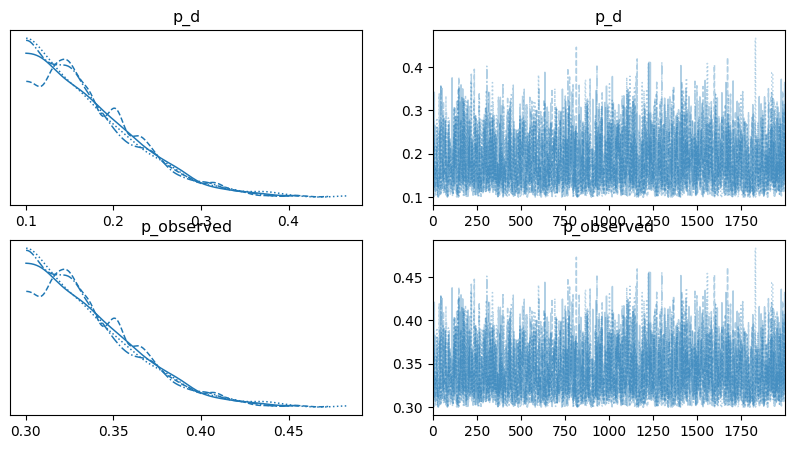

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_d,0.176,0.059,0.1,0.281,0.001,0.001,1981.0,2095.0,1.0
p_observed,0.338,0.029,0.3,0.391,0.001,0.000,1981.0,2095.0,1.0


In [11]:
with pm.Model() as model:

    #Zmienna reprezentująca rzeczywiste prawdopodobieństwo, jako stała wartość
    p_d = pm.Uniform("p_d", 0.1)

    #Zmienna deterministyczna reprezentująca zaobserwowane prawdopodobieństwo odpowiedzi "tak"
    #0.25 - przypadek dwukrotnego wyrzucenia orła
    #0.5 - przypadek wyrzucenia reszki w pierwszym rzucie
    p_observed = pm.Deterministic("p_observed", 0.25 + 0.5*p_d)

    #Liczba osób, które powiedziały "tak"
    yes_count = 30

    #Modelowanie dla 100 ankietowanych 
    answers = pm.Binomial("answers", 100, p_observed, observed=yes_count)
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True, legend=False, figsize=(10, 5))
az.summary(idata)

p_d (Rzeczywiste prawdopodobieństwo zażywania narkotyków):

-Średnia 0.176, estymowane prawdopodobieństwo wskazuje, że dana osoba w rzeczywistości zażywa narkotyki, wynosi około 17.6%.

-Odchylenie standardowe 0.059, relatywnie niska wartość oznacza, że nasze estymacje są dosyć spójne.

-HDI przedział wiarygodności [0.1, 0.281] wskazuje, że rzeczywiste prawdopodobieństwo zażywania narkotyków jest najprawdopodobniej między 10 a 28,1%. 

p_observed (Zaobserwowane prawdopodobieństwo odpowiedzi „tak”):

-Średnia 0.338 średnie zaobserwowane prawdopodobieństwo odpowiedzi twierdzącej wynosi 33.8%.

-Odchylenie standardowe 0.029 wskazuje na  małe rozproszenie wyników, co oznacza, że nasze wyniki są precyzyjne.

-HDI przedział wiarygodności [0.3, 0.391], prawdopodobieństwo odpowiedzi „tak” leży między 30% a 39.1%.

Rzeczywiste prawdopodobieństwa nie pokrywają się z zaobserwowanymi, które zawyżają względem estymowanego rzeczywistego prawdopodobieństwa

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_d]


Output()

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 3 seconds.


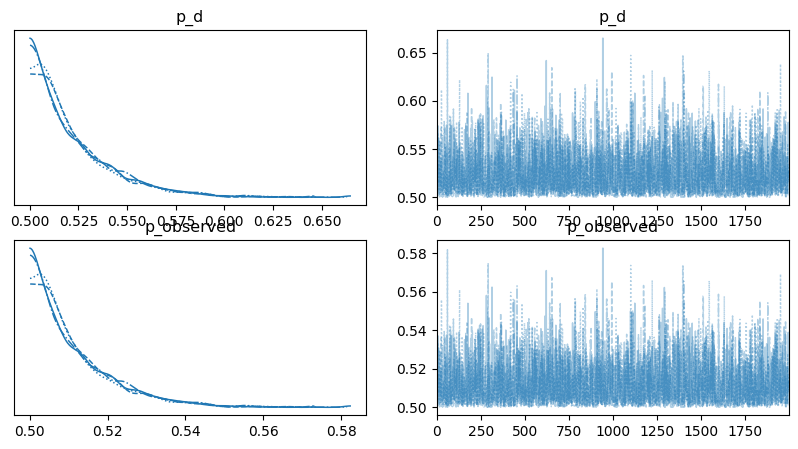

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_d,0.523,0.022,0.5,0.562,0.0,0.0,2107.0,1936.0,1.0
p_observed,0.511,0.011,0.5,0.531,0.0,0.0,2107.0,1936.0,1.0


In [12]:
with pm.Model() as model:

    #Zmienna reprezentująca rzeczywiste prawdopodobieństwo, jako stała wartość
    p_d = pm.Uniform("p_d", 0.5)

    #Zmienna deterministyczna reprezentująca zaobserwowane prawdopodobieństwo odpowiedzi "tak"
    #0.25 - przypadek dwukrotnego wyrzucenia orła
    #0.5 - przypadek wyrzucenia reszki w pierwszym rzucie
    p_observed = pm.Deterministic("p_observed", 0.25 + 0.5*p_d)

    #Liczba osób, które powiedziały "tak"
    yes_count = 30

    #Modelowanie dla 100 ankietowanych 
    answers = pm.Binomial("answers", 100, p_observed, observed=yes_count)
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True, legend=False, figsize=(10, 5))
az.summary(idata)

p_d (Rzeczywiste prawdopodobieństwo zażywania narkotyków):

-Średnia 0.523, estymowane prawdopodobieństwo wskazuje, że dana osoba w rzeczywistości zażywa narkotyki, wynosi około 52.3%.

-Odchylenie standardowe 0.022, niska wartość oznacza, że nasze estymacje są spójne.

-HDI przedział wiarygodności [0.5, 0.562] wskazuje, że rzeczywiste prawdopodobieństwo zażywania narkotyków jest najprawdopodobniej między 50 a 56,2%. 

p_observed (Zaobserwowane prawdopodobieństwo odpowiedzi „tak”):

-Średnia 0.511 średnie zaobserwowane prawdopodobieństwo odpowiedzi twierdzącej wynosi 51.1%.

-Odchylenie standardowe 0.011 wskazuje na bardzo małe rozproszenie wyników, co oznacza, że nasze wyniki są bardzo precyzyjne.

-HDI przedział wiarygodności [0.5, 0.531], prawdopodobieństwo odpowiedzi „tak” leży między 50% a 53.1%.

Rzeczywiste prawdopodobieństwa są bardzo zbliżone do zaobserwowanych, przedziały HDI częściowo się pokrywają

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_d]


Output()

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 4 seconds.


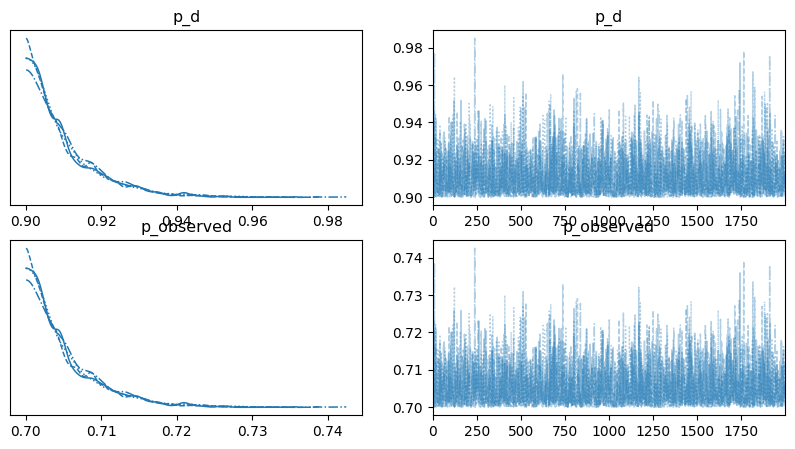

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_d,0.910,0.010,0.9,0.928,0.0,0.0,2943.0,3025.0,1.0
p_observed,0.705,0.005,0.7,0.714,0.0,0.0,2943.0,3025.0,1.0


In [13]:
with pm.Model() as model:

    #Zmienna reprezentująca rzeczywiste prawdopodobieństwo, jako stała wartość
    p_d = pm.Uniform("p_d", 0.9)

    #Zmienna deterministyczna reprezentująca zaobserwowane prawdopodobieństwo odpowiedzi "tak"
    #0.25 - przypadek dwukrotnego wyrzucenia orła
    #0.5 - przypadek wyrzucenia reszki w pierwszym rzucie
    p_observed = pm.Deterministic("p_observed", 0.25 + 0.5*p_d)

    #Liczba osób, które powiedziały "tak"
    yes_count = 30

    #Modelowanie dla 100 ankietowanych 
    answers = pm.Binomial("answers", 100, p_observed, observed=yes_count)
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True, legend=False, figsize=(10, 5))
az.summary(idata)

p_d (Rzeczywiste prawdopodobieństwo zażywania narkotyków):

-Średnia 0.910, estymowane prawdopodobieństwo wskazuje, że dana osoba w rzeczywistości zażywa narkotyki, wynosi około 91%.

-Odchylenie standardowe 0.010, bardzo niska wartość oznacza, że nasze estymacje są bardzo spójne.

-HDI przedział wiarygodności [0.9, 0.928] wskazuje, że rzeczywiste prawdopodobieństwo zażywania narkotyków jest najprawdopodobniej między 90 a 92,8%. 

p_observed (Zaobserwowane prawdopodobieństwo odpowiedzi „tak”):

-Średnia 0.705 średnie zaobserwowane prawdopodobieństwo odpowiedzi twierdzącej wynosi 70.5%.

-Odchylenie standardowe 0.005 wskazuje na bardzo małe rozproszenie wyników, co oznacza, że nasze wyniki są bardzo precyzyjne.

-HDI przedział wiarygodności [0.7, 0.714], prawdopodobieństwo odpowiedzi „tak” leży między 70% a 71.4%.

Rzeczywiste prawdopodobieństwa nie pokrywają się z zaobserwowanymi, które zaniżają względem estymowanego rzeczywistego prawdopodobieństwa

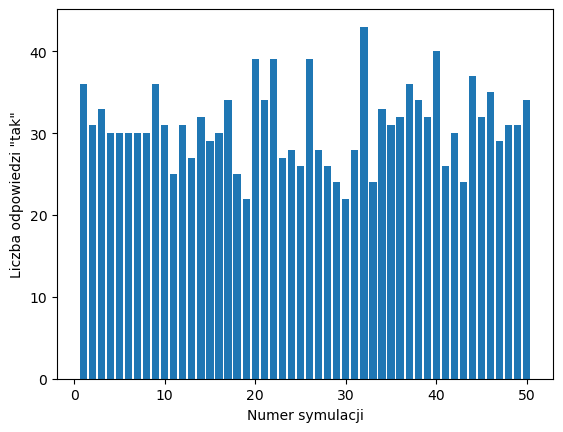

Średnia: 30.92
Odchylenie standardowe: 4.74


In [17]:
#Ustalmy parametry symulacji
true_p_d = 0.1   #rzeczywiste prawdopodobieństwo zażywania narkotyków
group_size = 100 #liczba osób w każdej ankiecie
repeats = 50     #liczba powtórzeń ankiety

#Lista do przechowywania wyników "yes" dla każdej symulacji
yes_counts = []

#Powtarzamy symulację 50 razy
for _ in range(repeats):
    with pm.Model() as model:
        #Rzeczywiste prawdopodobieństwo jako stała wartość
        p_d = true_p_d

        #Obserwowane prawdopodobieństwo odpowiedzi "tak" (uwzględnia losowy mechanizm)
        p_observed = 0.25 + 0.5 * p_d

        #Generowanie losowych odpowiedzi "tak" z rozkładu dwumianowego
        yes_count = np.random.binomial(group_size, p_observed)
        
        #Dodajemy wynik do listy
        yes_counts.append(yes_count)

#Wyświetlamy wyniki
yes_counts

plt.bar(range(1, repeats + 1), yes_counts)
plt.ylabel('Liczba odpowiedzi "tak"')
plt.xlabel('Numer symulacji')
plt.show()

print(f'Średnia: {np.mean(yes_counts)}')
print(f'Odchylenie standardowe: {np.std(yes_counts):.2f}')

Dla 50 powtórzeń symulacji średnia liczba odpowiedzi "tak" na symulację wynosi około 30.92 na 100 ankietowanych z odchyleniem standardowym na poziomie około 4.74